In [ ]:
import numpy as np

profile = np.array([.5,.5,.1])
usage = np.zeros(10)
usage2 = np.array([.3,.6,.5,.7,.2,.2,.1])

In [1]:
import numpy as np

def can_schedule(available_rss, required_rss):
    if available_rss.size != required_rss.size:
        print("two array should have same size")
    if np.all(available_rss-required_rss > 0):
        return True
    else:
        return False

In [2]:
def earliest_schedule_time(usage, profile):
    if usage.ndim > 1 | profile.ndim > 1:
        print("inputs should be 1d np arrary")
    available_rss = 1 - usage
    scope = available_rss.shape[0]+1
    available_rss_append = np.hstack((available_rss,np.ones(profile.shape[0])))
    
    # print(available_rss.shape)
    for shift in range(scope):
        if can_schedule(available_rss_append[shift:shift+profile.shape[0]], profile):
            return shift
        

In [ ]:
import multiprocessing
multiprocessing.cpu_count()

In [ ]:
import os
# number of available cpu cores
# len(os.sched_getaffinity(0))

In [3]:
from multiprocessing import cpu_count, Pool
import time
import numpy as np

def spin(interval):
    # spin for interval time, interval use unit sec
    t_start = time.clock()
    while time.clock()-t_start < interval:
        2*2

def spin_and_sleep(arg):
    granularity = 0.001 # 1ms
    # percent = 0.3
    percent = arg[0]
    interval = arg[1]
    t_start = time.clock()
    while time.clock()-t_start < interval:
        t0_start = time.clock()
        while time.clock()-t0_start < granularity*percent:
            2*2 #busy
        time.sleep(granularity*(1-percent))
        
        
def set_cpu_usage_1(percent, interval):
    processes = np.int(cpu_count()*percent)
    #print(processes)
    pool = Pool(processes)
    # A parallel equivalent of the map() built-in function 
    # (it supports only one iterable argument though).
    # It blocks until the result is ready.
    pool.map(spin, [interval]*processes)
    
def set_cpu_usage_2(percent, interval):
    processes = cpu_count()
    
    pool = Pool(processes)
    pool.map(spin_and_sleep, [(percent, interval)]*processes)
    pool.terminate()

In [ ]:
set_cpu_usage_1(0.5, 20)
# spin(1, 30)

In [ ]:
set_cpu_usage_2(0.5, 10)

In [ ]:
# linux cpulimit

In [42]:

def applyRandomProfile(interval, rand_seed, num_break_pt):
    # generate a random perfoile for a certain interval
    np.random.seed(rand_seed)
    usage_lvl = np.random.rand(num_break_pt) 
    interval_len = np.random.rand(num_break_pt)
    interval_len = interval_len/sum(interval_len)*interval
    print("The random profile has following shape")
    print("usage_lvl: ", usage_lvl)
    print("interval_len: ", interval_len)
    for i in range(num_break_pt):
        set_cpu_usage_2(usage_lvl[i], interval_len[i])
    return interval_len, usage_lvl
    

In [43]:

interval_len, usage_lvl = applyRandomProfile(5, 0 ,15)


The random profile has following shape
usage_lvl:  [0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492
 0.56804456 0.92559664 0.07103606]
interval_len:  [0.05192047 0.01204817 0.49615934 0.4637047  0.51844146 0.58316004
 0.47621971 0.2749962  0.46511843 0.0704799  0.38132984 0.08542443
 0.56292953 0.31097015 0.24709763]


(0, 1)

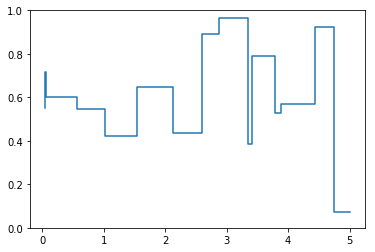

In [44]:
import matplotlib.pyplot as plt
import numpy as np
interval_tic = np.cumsum(interval_len)
plt.ylim((0,1))
plt.step(interval_tic, usage_lvl)

In [28]:
def applyPredefinedProfile(interval_len, usage_lvl):
    if(interval_len.shape[0] != usage_lvl.shape[0]):
        print("interval size and usage level size should agree")
    for i in range(interval_len.shape[0]):
        set_cpu_usage_2(usage_lvl[i], interval_len[i])
        

(0, 1)

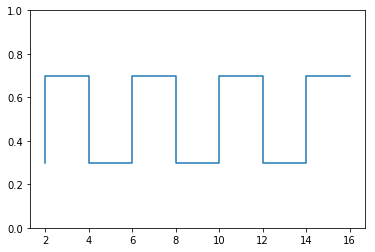

In [41]:
import matplotlib.pyplot as plt
import numpy as np
interval_len = np.array([2]*8)
interval_tic = np.cumsum(interval_len)
usage_lvl = np.array([0.3,0.7]*4)
#plt.plot(list(range(8)), usage_lvl)
plt.ylim((0,1))

plt.step(interval_tic, usage_lvl)


In [37]:
applyPredefinedProfile(interval_len, usage_lvl)

In [45]:
# write matrix inversion lambda function
import numpy as np
def matrix_inversion(n):
    A = np.random.rand(n,n)
    pos_def_mat = np.dot(A,A.transpose())
    np.linalg.inv(pos_def_mat)

In [47]:
n = 10000
matrix_inversion(n)